In [30]:
# Import necessary packages
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection
from emk_deeplabcut.graphing import graph_body_part as g

! jupyter nbextension enable --py --sys-prefix widgetsnbextension
! jupyter nbextension install --py --symlink --sys-prefix ipympl
%matplotlib inline

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Installing /Users/bojunfeng/opt/anaconda3/lib/python3.8/site-packages/ipympl/nbextension -> jupyter-matplotlib
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable ipympl --py --sys-prefix
    


In [5]:
fpath = "/Users/bojunfeng/Downloads/vidDLC_resnet50_testFeb5shuffle1_40000_filtered.csv"
clst = ["head", "back", "rear", "tail"]

# Format the CSV
absolute_pos = g.format_csv(fpath)
# Drop rows with mull values
absolute_pos = absolute_pos.dropna()
# Reset the index from formatting
absolute_pos = absolute_pos.reset_index()
# Drop the first two columns that are inaccurate labels
absolute_pos = absolute_pos.drop(absolute_pos.columns[[0, 1]], axis=1)

# Calculate the relative position
relative_pos = g.get_bofy_info(fpath, clst)
# Drop rows with mull values
relative_pos = relative_pos.dropna()

relative_pos

,head_back_distance,back_rear_distance,rear_tail_distance,back_angle,rear_angle
0,77.589706,111.578182,71.690841,194.095339,169.203801
1,79.845662,110.819286,72.384081,193.599033,169.283879
2,79.831762,110.818536,72.357218,193.594648,169.252295
3,79.728164,111.579615,71.564649,193.567609,169.114504
4,79.520589,111.558298,71.694753,193.478202,168.408494
...,...,...,...,...,...
29302,100.192386,128.443129,153.496118,158.652456,175.612467
29303,99.401353,128.360141,153.520106,157.651609,175.669027
29304,99.410387,128.317224,153.520071,157.555680,175.691846
29305,98.826377,128.014874,153.524742,157.574971,175.848268


In [6]:
features = list(relative_pos.columns)
print("Feature List: ", features)
print("Number of Features: ", len(features))

Feature List:  ['head_back_distance', 'back_rear_distance', 'rear_tail_distance', 'back_angle', 'rear_angle']
Number of Features:  5


In [7]:
# Standardizing the features to optimize training result
scaled_features = StandardScaler().fit_transform(relative_pos.to_numpy())
scaled_df = pd.DataFrame(scaled_features)
scaled_df

,0,1,2,3,4
0,0.297390,-0.035261,-0.896368,-0.005300,-0.287522
1,0.425518,-0.062676,-0.881289,-0.016604,-0.285356
2,0.424728,-0.062703,-0.881873,-0.016704,-0.286210
3,0.418844,-0.035209,-0.899113,-0.017320,-0.289937
4,0.407055,-0.035980,-0.896283,-0.019356,-0.309031
...,...,...,...,...,...
29302,1.581120,0.573972,0.883059,-0.812596,-0.114195
29303,1.536193,0.570975,0.883581,-0.835393,-0.112666
29304,1.536706,0.569424,0.883580,-0.837578,-0.112049
29305,1.503537,0.558502,0.883682,-0.837138,-0.107818


In [8]:
# Perform Principal Component Analysis
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(scaled_df)
finalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', "pc3", "pc4", "pc5"])
finalDf

,pc1,pc2,pc3,pc4,pc5
0,-0.039573,-0.654911,0.002092,-0.673467,0.303017
1,0.034069,-0.613837,-0.021479,-0.714159,0.393607
2,0.033632,-0.615010,-0.021584,-0.713894,0.393373
3,0.040137,-0.632856,-0.003466,-0.725020,0.376369
4,0.038540,-0.648820,-0.006047,-0.709183,0.375175
...,...,...,...,...,...
29302,1.935866,0.571947,-0.204330,-0.035884,0.405943
29303,1.917365,0.560881,-0.224534,-0.020282,0.368083
29304,1.917771,0.561407,-0.227175,-0.020915,0.368025
29305,1.890735,0.558960,-0.234994,-0.008577,0.351076


In [9]:
# This function creates an interactive plot of two principal components
def pcplot(df, a, b):
    xlst = df["pc" + str(a)].to_numpy().astype(float)
    ylst = df["pc" + str(b)].to_numpy().astype(float)

    # Plot the data
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component' + str(a), fontsize = 15)
    ax.set_ylabel('Principal Component' + str(b), fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    scatter = ax.scatter(x = xlst, y = ylst, alpha=.02)

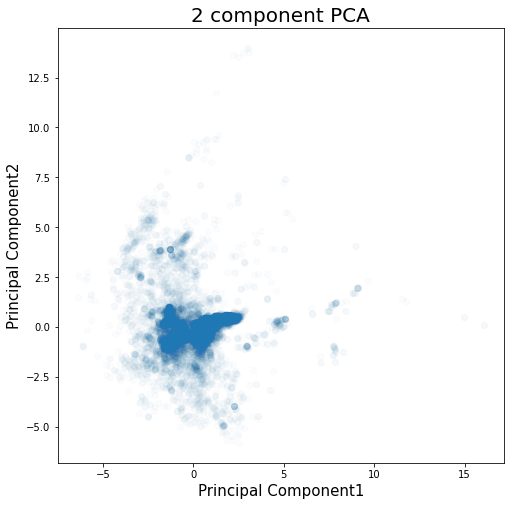

In [10]:
# Focusing on 1 and 2 here because they carry the most information
pcplot(finalDf, 1, 2)

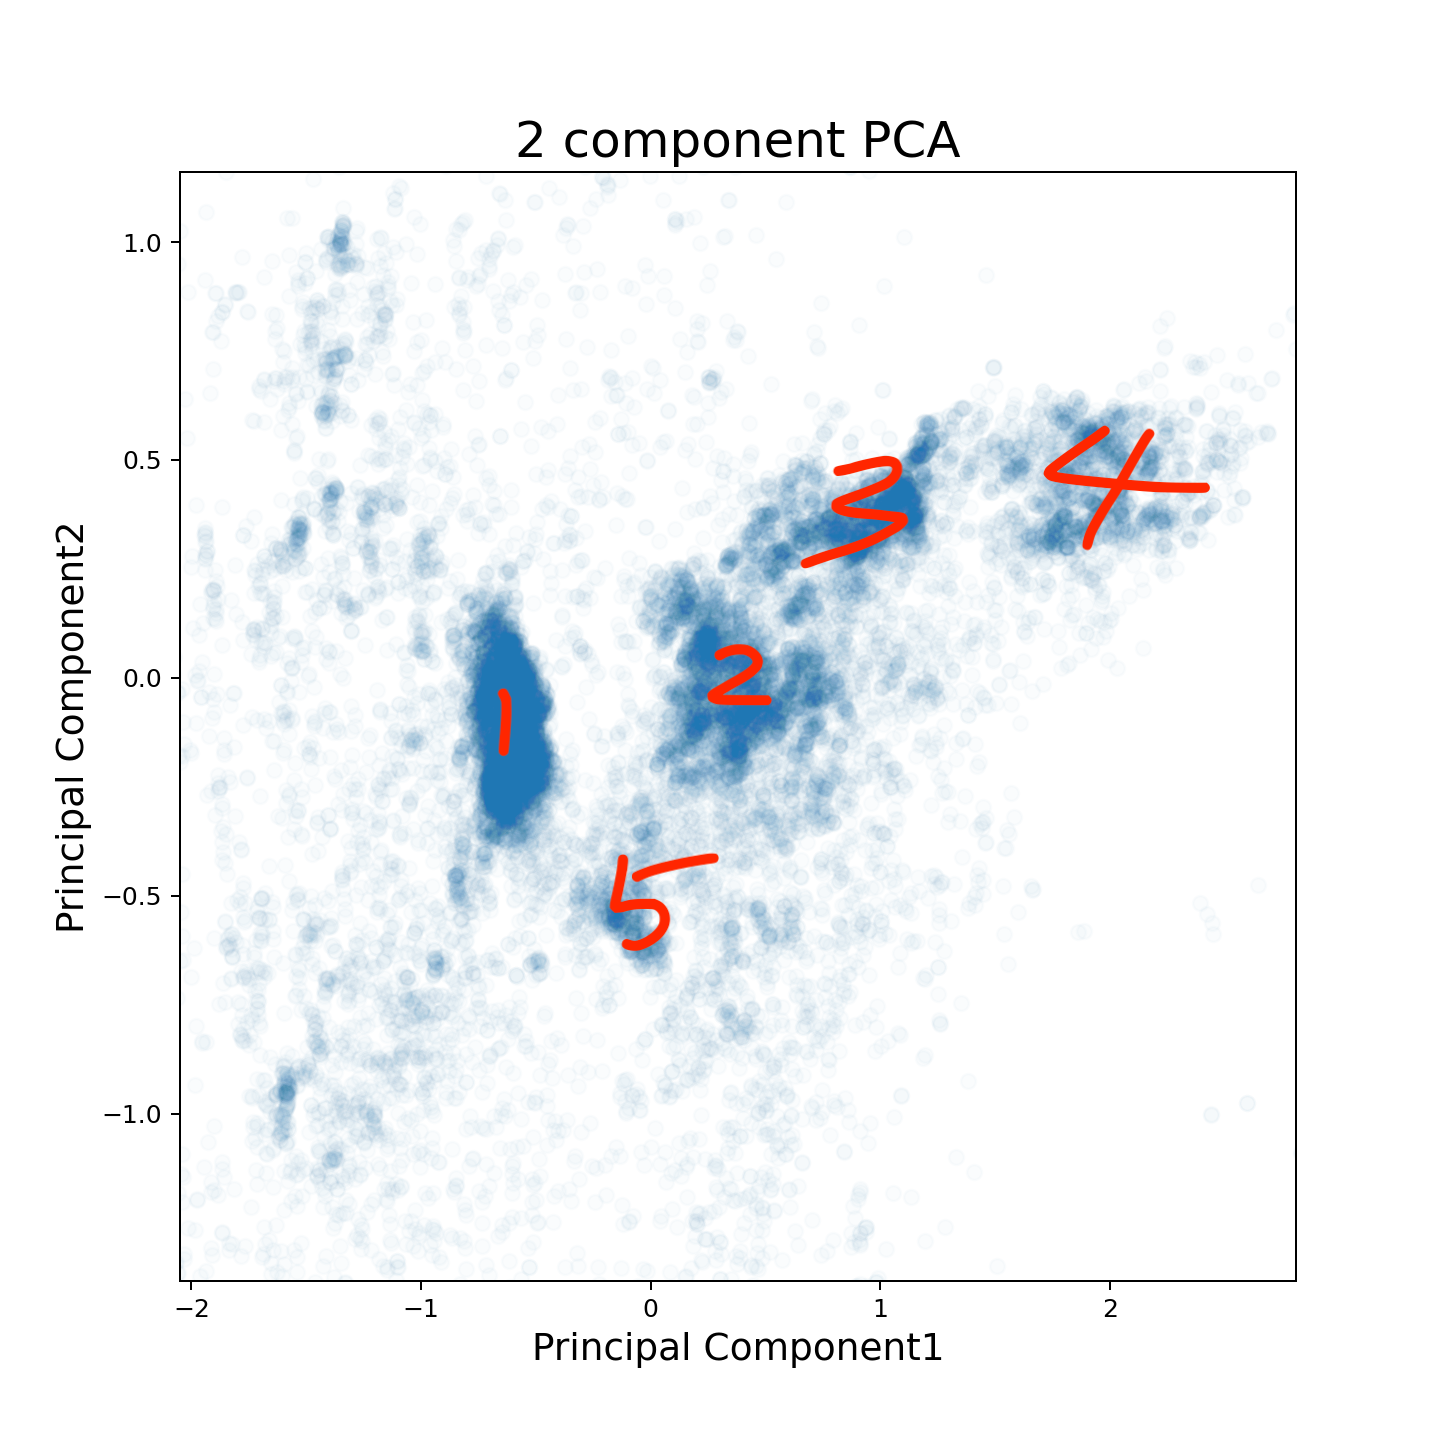

In [11]:
Image(filename='Figure 1.png')

In [36]:
# selecting rows based on condition 

def bound(x, y, xmin, xmax, ymin, ymax):
    return (xmin < x) & (x < xmax) & (ymin < y) & (y < ymax)

pc_val = 1

# this part makes it easier to choose clusters
if pc_val == 1:
    cluster1 = finalDf[bound(finalDf['pc1'], finalDf['pc2'], -0.7, -0.5, -0.3, 0.1)]
    cluster2 = finalDf[bound(finalDf['pc1'], finalDf['pc2'], 0.1, 0.6, -0.16, 0.16)]
    cluster3 = finalDf[bound(finalDf['pc1'], finalDf['pc2'], 0.73, 1.16, 0.28, 0.48)]
    cluster4 = finalDf[bound(finalDf['pc1'], finalDf['pc2'], 1.6, 2.4, 0.21, 0.67)]
    cluster5 = finalDf[bound(finalDf['pc1'], finalDf['pc2'], -0.4, 0.2, -0.7, -0.4)]
elif pc_val == 2:
    cluster1 = finalDf[bound(finalDf['pc2'], finalDf['pc3'], -0.4, 0.15, -0.31, 0.008)]
    cluster2 = finalDf[bound(finalDf['pc2'], finalDf['pc3'], -0.204, 0.014, 0.078, 0.345)]
    cluster3 = finalDf[bound(finalDf['pc2'], finalDf['pc3'], -0.025, 0.240, 0.345, 0.6)]
    cluster4 = finalDf[bound(finalDf['pc2'], finalDf['pc3'], 0.232, 0.528, 0.224, 0.512)]
elif pc_val == 3:
    cluster1 = finalDf[bound(finalDf['pc3'], finalDf['pc4'], -0.388, 0.053, -0.044, 0.346)]
    cluster2 = finalDf[bound(finalDf['pc3'], finalDf['pc4'], -0.388, 0.053, 0.346, 0.510)]
    cluster3 = finalDf[bound(finalDf['pc3'], finalDf['pc4'], 0.279, 0.577, 0.166, 0.370)]
    cluster4 = finalDf[bound(finalDf['pc3'], finalDf['pc4'], 0.45, 0.81, 0.370, 0.569)]
elif pc_val == 4:
    cluster1 = finalDf[bound(finalDf['pc4'], finalDf['pc5'], -0.142, 0.655, -0.111, 0.427)]
    cluster2 = finalDf[bound(finalDf['pc4'], finalDf['pc5'], 0.13, 0.35, -0.447, -0.185)]
    cluster3 = finalDf[bound(finalDf['pc4'], finalDf['pc5'], 0.11, 0.45, -0.782, -0.471)]
    
index1 = cluster1.index
print("\nFirst Cluster Index:\n", index1)

index2 = cluster2.index
print('\nSecond Cluster Index :\n', index2)

cluster1_relative = relative_pos.iloc[index1]
cluster2_relative = relative_pos.iloc[index2]
cluster1_absolute = absolute_pos.iloc[index1]
cluster2_absolute = absolute_pos.iloc[index2]


First Cluster Index:
 Int64Index([ 1852,  1954,  1955,  1964,  1965,  1966,  1967,  1968,  1969,
             1970,
            ...
            28536, 28537, 28538, 28539, 28540, 28541, 28542, 28543, 28544,
            28545],
           dtype='int64', length=5819)

Second Cluster Index :
 Int64Index([ 1108,  1109,  1110,  1113,  1115,  1116,  1117,  1118,  1119,
             1120,
            ...
            28099, 28100, 28101, 28102, 28103, 28104, 28105, 28106, 28643,
            28644],
           dtype='int64', length=3091)


In [37]:
cluster1_absolute

,head_x,head_y,head_likelihood,back_x,back_y,back_likelihood,rear_x,rear_y,rear_likelihood,tail_x,tail_y,tail_likelihood
1852,883.2327880859375,549.5337524414062,0.9756254553794861,823.5718383789062,564.6555786132812,0.8064444661140442,748.5015869140625,633.3194580078125,0.10966759920120239,650.2769165039062,691.9475708007812,0.947097897529602
1954,874.5482177734375,139.50059509277344,0.996616780757904,854.6851196289062,202.36880493164062,0.9979179501533508,862.9891357421875,307.2837829589844,0.9987884163856506,871.0320434570312,411.0159606933594,0.9963829517364502
1955,874.8622436523438,139.50059509277344,0.9961723685264587,854.83544921875,202.36880493164062,0.9975499510765076,862.724853515625,307.10711669921875,0.998918890953064,870.9843139648438,411.2911071777344,0.9951803684234619
1964,878.8424072265625,140.27365112304688,0.9952297210693359,855.2315063476562,202.7798614501953,0.9982116222381592,862.2388305664062,306.3770446777344,0.9987539052963257,869.8206176757812,413.6987609863281,0.9933004379272461
1965,879.5309448242188,141.2471160888672,0.9968823194503784,855.2315063476562,203.30860900878906,0.996302604675293,862.2694702148438,306.3440856933594,0.9989175796508789,868.038330078125,410.90093994140625,0.9960765242576599
...,...,...,...,...,...,...,...,...,...,...,...,...
28541,867.1751708984375,139.8043670654297,0.9979604482650757,852.0481567382812,200.05789184570312,0.9983152151107788,860.3203735351562,301.5644836425781,0.9938580393791199,864.9697875976562,414.5294494628906,0.9943285584449768
28542,866.7210693359375,140.0908660888672,0.9978548884391785,852.2789916992188,200.0283966064453,0.9982010126113892,860.451904296875,301.6304626464844,0.9940168857574463,864.987548828125,414.5294494628906,0.9941710829734802
28543,866.5947265625,140.1690673828125,0.9980265498161316,852.2898559570312,200.05789184570312,0.9982263445854187,860.4659423828125,301.6304626464844,0.994077205657959,865.2286987304688,414.5294494628906,0.9941651225090027
28544,863.9273071289062,140.17860412597656,0.9959716200828552,852.2898559570312,200.05789184570312,0.9990763664245605,860.75390625,302.276123046875,0.996273398399353,865.2474365234375,414.5950927734375,0.9944379329681396


The everage difference in head_back_distance was  3.7338161579715035
The percentile difference in head_back_distance was  5.726082302311015 

The everage difference in back_rear_distance was  30.573691400709237
The percentile difference in back_rear_distance was  30.58523924796539 

The everage difference in rear_tail_distance was  16.033173446798372
The percentile difference in rear_tail_distance was  14.83624456579545 

The everage difference in back_angle was  14.83909133064671
The percentile difference in back_angle was  7.827980906666116 

The everage difference in rear_angle was  2.5982053036747743
The percentile difference in rear_angle was  1.466383144758506 



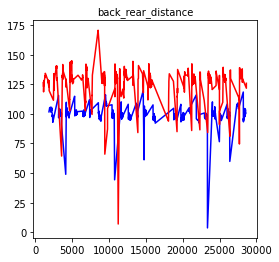

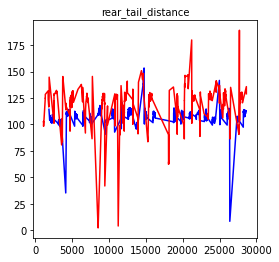

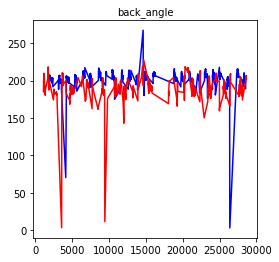

In [38]:

# Plot the data
def plt_val(var, df, df2):
    fig = plt.figure()
    fig.set_size_inches(4, 4, forward=True)
    ax1 = fig.add_subplot(1,1,1)
    plot = ax1.plot(list(df.index.values), df[var], "-b")
    plot = ax1.plot(list(df2.index.values), df2[var], "-r")
    ax1.set_title(var, fontdict = {'fontsize': 10})

# Print the analysis
def prt_val(var, df, df2):
    smaller_average = min(df[var].mean(),df2[var].mean())
    abs_diff = abs(df[var].mean()-df2[var].mean())
    percentage = 100*(abs_diff/smaller_average)
    print("The everage difference in " + i + " was ", abs(df[var].mean()-df2[var].mean()))
    print("The percentile difference in " + i + " was ", percentage, "\n")

for i in list(relative_pos.columns):
    prt_val(i, cluster1_relative, cluster2_relative)
    
plt_val("back_rear_distance", cluster1_relative, cluster2_relative)
plt_val("rear_tail_distance", cluster1_relative, cluster2_relative)
plt_val("back_angle", cluster1_relative, cluster2_relative)

In [39]:
# Plot a graph of bodypart's position in respect to time
def obj_plotting_bodypart(pos, file, file2):
    
    # Select the columns needed
    posx = pos + "_x"
    posy = pos + "_y"
    poslike = pos + "_likelihood"

    # Convert data to float lists for graphing
    xlst = file[posx].to_numpy().astype(float)
    ylst = file[posy].to_numpy().astype(float)
    xlst2 = file2[posx].to_numpy().astype(float)
    ylst2 = file2[posy].to_numpy().astype(float)

    # Plot the data
    fig = plt.figure()
    fig.set_size_inches(4, 3, forward=True)
    ax = fig.add_subplot(1,1,1)
    scatter = ax.scatter(x = xlst, y = ylst, alpha = 0.2, c = "red")
    scatter = ax.scatter(x = xlst2, y = ylst2, alpha = 0.2, c = "blue")
    ax.set_title("Rat " + pos + " Position", fontdict = {'fontsize': 17})

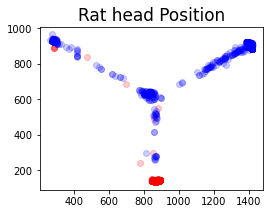

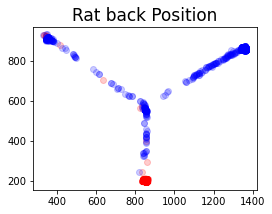

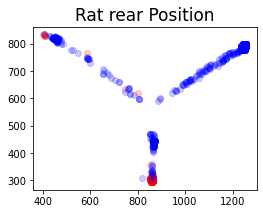

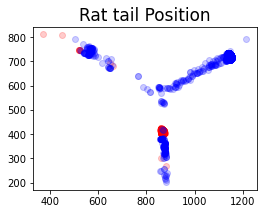

In [40]:
for i in clst:
    obj_plotting_bodypart(i, cluster1_absolute, cluster2_absolute)

In [41]:
# Save the nth frame of inpath to outpath in format "header_n.jpg"
# Remember to put "/" at the end of outpath
def save_nth_frame(inpath, n, outpath="/Users/bojunfeng/Downloads/", header=""):
    
    # Load the video
    cap= cv2.VideoCapture(inpath)
    # Get number for total frames
    total_frames = cap.get(7)
    
    # Check if imput is within correct bound
    if -1 < n and n < total_frames:
        # If so, get the image
        cap.set(1, n)
        ret, frame = cap.read()
        # Then save the file, naming it with the header
        if header == "":
            cv2.imwrite(outpath+str(n)+'.jpg',frame)
        else: 
            cv2.imwrite(outpath + header + "_" + str(n) + '.jpg',frame)
    else:
        # Raise an error if the input is not corerectly bounded
        print("ERROR save_nth_frame: Accessing " + str(n) + "th frame with total frame of " + str(total_frames))

In [42]:
import random

fpath = "/Users/bojunfeng/Downloads/vidDLC_resnet50_testFeb5shuffle1_40000_filtered_labeled.mp4"

for i in range(10):
    save_nth_frame(fpath, random.choice(index1), "/Users/bojunfeng/Downloads/cluster1/")
    save_nth_frame(fpath, random.choice(index2), "/Users/bojunfeng/Downloads/cluster1/999999999")

In [43]:
def rotate_pt(px, py, ang):
    ang = ang*np.pi/180
    sin_ang = np.sin(ang)
    cos_ang = np.cos(ang)
    x = (px * cos_ang) - (py * sin_ang)
    y = ((px * sin_ang) + (py * cos_ang))*-1
    return [x, y]

In [44]:
px = np.array([1, 0, 3])
py = np.array([1, -2, 3])

x1 = rotate_pt(px, py, 180)[0]
y1 = rotate_pt(px, py, 180)[1]
print(x1, y1)

[-1.0000000e+00  2.4492936e-16 -3.0000000e+00] [ 1. -2.  3.]


In [45]:
x1 = np.array([1, 0, 3])
y1 = np.array([1, -2, 0])

x2 = np.array([0, 0, 0])
y2 = np.array([0, 0, 0])

x3 = np.array([0, 0, 0])
y3 = np.array([1, 2, 3])



g.calculate_angle(x1, y1, x2, y2, x3, y3)

array([315., 180., 270.])

In [46]:
# selecting rows based on condition 

def bound(x, y, xmin, xmax, ymin, ymax):
    return (xmin < x) & (x < xmax) & (ymin < y) & (y < ymax)

pc_val = 3

if pc_val == 1:
    cluster1 = finalDf[bound(finalDf['pc1'], finalDf['pc2'], -0.7, -0.5, -0.3, 0.1)]
    cluster2 = finalDf[bound(finalDf['pc1'], finalDf['pc2'], 0.1, 0.6, -0.16, 0.16)]
    cluster1 = finalDf[bound(finalDf['pc1'], finalDf['pc2'], 0.73, 1.16, 0.28, 0.48)]
    cluster2 = finalDf[bound(finalDf['pc1'], finalDf['pc2'], 1.6, 2.4, 0.21, 0.67)]
    cluster1 = finalDf[bound(finalDf['pc1'], finalDf['pc2'], -0.4, 0.2, -0.7, -0.4)]
elif pc_val == 2:
    cluster1 = finalDf[bound(finalDf['pc2'], finalDf['pc3'], -0.4, 0.15, -0.31, 0.008)]
    cluster2 = finalDf[bound(finalDf['pc2'], finalDf['pc3'], -0.204, 0.014, 0.078, 0.345)]
    cluster1 = finalDf[bound(finalDf['pc2'], finalDf['pc3'], -0.025, 0.240, 0.345, 0.6)]
    cluster2 = finalDf[bound(finalDf['pc2'], finalDf['pc3'], 0.232, 0.528, 0.224, 0.512)]
elif pc_val == 3:
    cluster1 = finalDf[bound(finalDf['pc3'], finalDf['pc4'], -0.388, 0.053, -0.044, 0.346)]
    cluster2 = finalDf[bound(finalDf['pc3'], finalDf['pc4'], -0.388, 0.053, 0.346, 0.510)]
    cluster1 = finalDf[bound(finalDf['pc3'], finalDf['pc4'], 0.279, 0.577, 0.166, 0.370)]
    cluster2 = finalDf[bound(finalDf['pc3'], finalDf['pc4'], 0.45, 0.81, 0.370, 0.569)]
elif pc_val == 4:
    cluster1 = finalDf[bound(finalDf['pc4'], finalDf['pc5'], -0.142, 0.655, -0.111, 0.427)]
    cluster2 = finalDf[bound(finalDf['pc4'], finalDf['pc5'], 0.13, 0.35, -0.447, -0.185)]
    cluster1 = finalDf[bound(finalDf['pc4'], finalDf['pc5'], 0.11, 0.45, -0.782, -0.471)]
    
index1 = cluster1.index
print("\nFirst Cluster Index:\n", index1)

index2 = cluster2.index
print('\nSecond Cluster Index :\n', index2)

cluster1_relative = relative_pos.iloc[index1]
cluster2_relative = relative_pos.iloc[index2]
cluster1_absolute = absolute_pos.iloc[index1]
cluster2_absolute = absolute_pos.iloc[index2]


First Cluster Index:
 Int64Index([ 1349,  1357,  1366,  1405,  1406,  1407,  1408,  1671,  1672,
             1673,
            ...
            28087, 28088, 28089, 28090, 28091, 28092, 28093, 28644, 28656,
            28657],
           dtype='int64', length=2747)

Second Cluster Index :
 Int64Index([ 1393,  1394,  1396,  1397,  1398,  1399,  1400,  1401,  1402,
             1403,
            ...
            28951, 28952, 28953, 28954, 28955, 28956, 28957, 28958, 28959,
            28960],
           dtype='int64', length=1453)


In [50]:
# Turn arrays into line segments
def arr_to_lines(ax, ay, bx, by):
    a = list(zip(ax, ay))
    b = list(zip(bx, by))
    segments = [[a[i],b[i]] for i in range(len(a))]
    return segments


# Process the rat's body location such that the head is on the origin and the rear is on the x axis
# If graph is not None, also graph the body as line collections
def rotate_body(hx, hy, bx, by, rx, ry, tx, ty, graph = None):
    
    # put the head on the origin
    for x_pos in [bx, rx, tx, hx]:
        x_pos -= hx
    for y_pos in [by, ry, ty, hy]:
        y_pos -= hy
    
    # calculate the angle between the rear and the x-axis
    ones = np.full(rx.size, 1)
    zeroes = np.full(rx.size, 0)
    angle = 360 - g.calculate_angle(rx, ry, zeroes, zeroes, zeroes, ones)
    head = rotate_pt(hx, hy, angle)
    back = rotate_pt(bx, by, angle)
    rear = rotate_pt(rx, ry, angle)
    tail = rotate_pt(tx, ty, angle)
    
    # make the dataframe
    df = pd.DataFrame({'head_x':head[0], 
                       'head_y':head[1],
                       'back_x':back[0],
                       'back_y':back[1],
                       'rear_x':rear[0],
                       'rear_y':rear[1],
                       'tail_x':tail[0],
                       'tail_y':tail[1],})
    
    if graph != None:
        
        head_back = arr_to_lines(head[0], head[1], back[0], back[1])
        back_rear = arr_to_lines(back[0], back[1], rear[0], rear[1])
        rear_tail = arr_to_lines(rear[0], rear[1], tail[0], tail[1])
        lines = np.append(head_back, back_rear, axis = 0)
        lines = np.append(lines, rear_tail, axis = 0)
        lc = LineCollection(lines, linewidths=1, alpha = 0.1)
        
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 1, 1)
        ax1.add_collection(lc)
        ax1.autoscale()

        x = [i[0] for j in lines for i in j]
        y = [i[1] for j in lines for i in j]

        ax1.scatter(x, y, alpha = 0.5)

        plt.show()



# Run rotate_body on a dataframe
def rotate_body_df(df, graph = None):
    # drop the likelihood columns
    df = df.drop(df.iloc[:, 2::3], axis = 1)
    return rotate_body(df.iloc[:, 0]. to_numpy().astype(float),
                       df.iloc[:, 1]. to_numpy().astype(float),
                       df.iloc[:, 2]. to_numpy().astype(float),
                       df.iloc[:, 3]. to_numpy().astype(float),
                       df.iloc[:, 4]. to_numpy().astype(float),
                       df.iloc[:, 5]. to_numpy().astype(float),
                       df.iloc[:, 6]. to_numpy().astype(float),
                       df.iloc[:, 7]. to_numpy().astype(float),
                       graph)

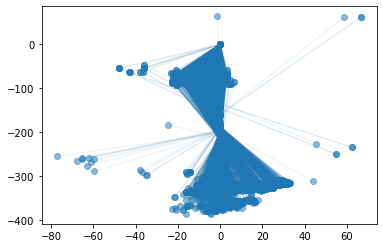

In [51]:
rotate_body_df(cluster1_absolute, graph = 1)
# this should give us the body position of the rat in the first cluster, visualized in a graph

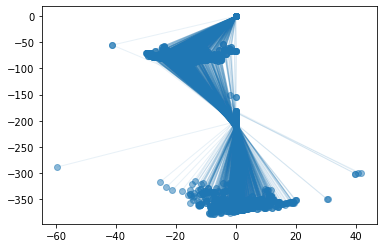

In [52]:
rotate_body_df(cluster2_absolute, graph = 1)
# same effect, different cluster